In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars-dataset-audi-bmw-ford-hyundai-skoda-vw/cars_dataset.csv


# Load dataset and EDA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

cars = pd.read_csv("/kaggle/input/cars-dataset-audi-bmw-ford-hyundai-skoda-vw/cars_dataset.csv")
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [3]:
cars.isna().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
Make            False
dtype: bool

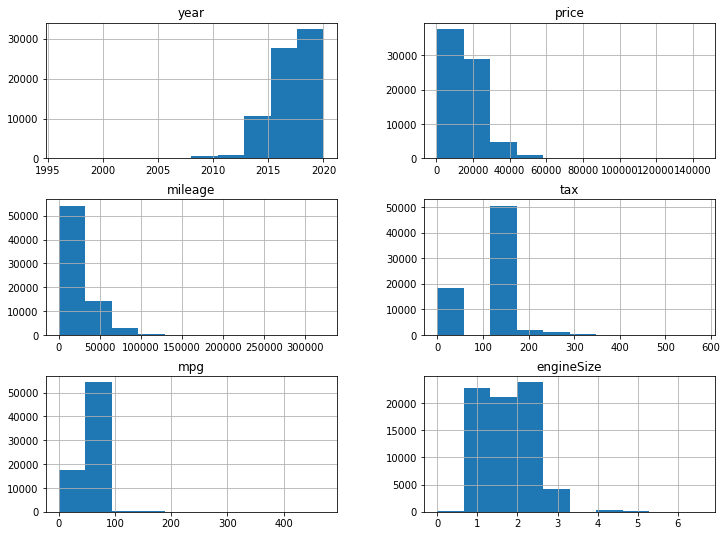

In [4]:
cars.hist(figsize=(12, 9))
plt.show()

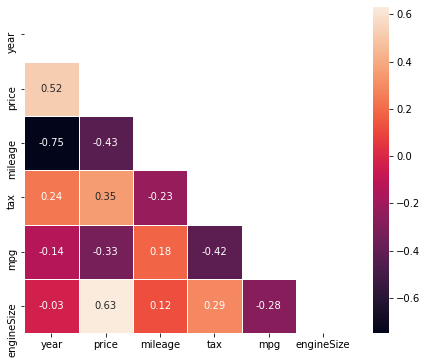

In [5]:
plt.figure(figsize=(8, 6))
correlations = cars.corr().round(2)
mask = np.triu(np.ones_like(correlations))
sns.heatmap(data=correlations, mask=mask, square=True, linewidths=0.5, annot=True)
plt.show()

In [6]:
from collections import Counter

print(Counter(cars["Make"]))
print(Counter(("_".join(model) for model in zip(cars["Make"].to_list(), cars["model"].to_list()))))
print(Counter(cars["transmission"]))
print(Counter(cars["fuelType"]))

Counter({'Ford': 17964, 'vw': 15157, 'BMW': 10781, 'audi': 10668, 'toyota': 6738, 'skoda': 6267, 'Hyundai': 4860})
Counter({'Ford_ Fiesta': 6556, 'vw_ Golf': 4863, 'Ford_ Focus': 4588, 'vw_ Polo': 3287, 'BMW_ 3 Series': 2443, 'Ford_ Kuga': 2225, 'toyota_ Yaris': 2122, 'BMW_ 1 Series': 1969, 'toyota_ Aygo': 1961, 'audi_ A3': 1929, 'vw_ Tiguan': 1765, 'skoda_ Fabia': 1571, 'skoda_ Octavia': 1477, 'audi_ Q3': 1417, 'audi_ A4': 1381, 'audi_ A1': 1347, 'Hyundai_ Tucson': 1300, 'BMW_ 2 Series': 1229, 'Ford_ EcoSport': 1143, 'Hyundai_ I10': 1092, 'BMW_ 5 Series': 1056, 'BMW_ 4 Series': 995, 'vw_ Passat': 915, 'vw_ Up': 884, 'audi_ A5': 882, 'audi_ Q5': 877, 'audi_ Q2': 822, 'BMW_ X1': 804, 'skoda_ Superb': 791, 'audi_ A6': 748, 'vw_ T-Roc': 733, 'toyota_ Auris': 712, 'BMW_ X3': 551, 'Ford_ C-MAX': 543, 'Hyundai_ I30': 536, 'Ford_ Ka+': 531, 'Ford_ Mondeo': 526, 'Hyundai_ I20': 496, 'toyota_ C-HR': 479, 'toyota_ RAV4': 473, 'skoda_ Kodiaq': 472, 'skoda_ Citigo': 470, 'BMW_ X5': 468, 'skoda_ Ye

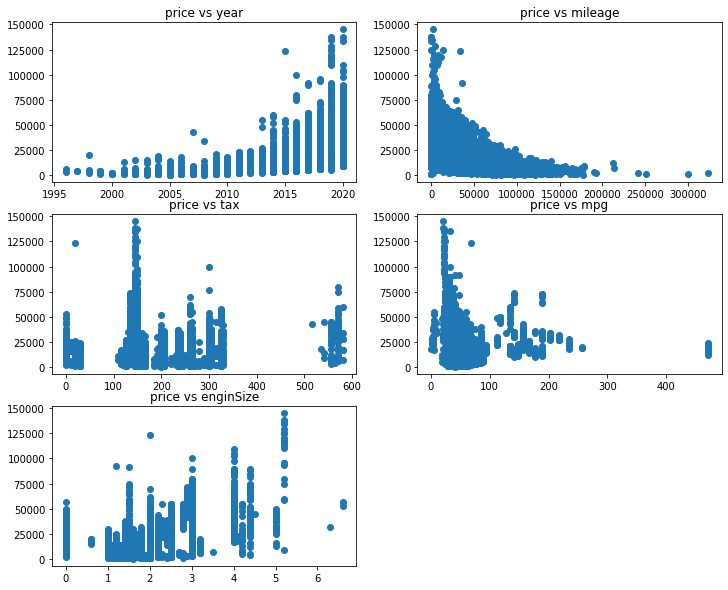

In [7]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.scatter(cars["year"], cars["price"])
plt.title("price vs year")
plt.subplot(3, 2, 2)
plt.scatter(cars["mileage"], cars["price"])
plt.title("price vs mileage")
plt.subplot(3, 2, 3)
plt.scatter(cars["tax"], cars["price"])
plt.title("price vs tax")
plt.subplot(3, 2, 4)
plt.scatter(cars["mpg"], cars["price"])
plt.title("price vs mpg")
plt.subplot(3, 2, 5)
plt.scatter(cars["engineSize"], cars["price"])
plt.title("price vs enginSize")
plt.show()

In [8]:
cars[cars["mpg"] > 400]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
10700,i3,2016,17100,Automatic,25269,Other,0.0,470.8,0.6,BMW
11289,i3,2017,19998,Automatic,41949,Hybrid,140.0,470.8,0.0,BMW
11446,i3,2017,19998,Automatic,41146,Hybrid,0.0,470.8,0.0,BMW
11448,i3,2017,21898,Automatic,10839,Hybrid,0.0,470.8,0.0,BMW
12534,i3,2017,19980,Automatic,26965,Hybrid,140.0,470.8,0.0,BMW
13020,i3,2016,19490,Automatic,8421,Hybrid,0.0,470.8,0.0,BMW
13945,i3,2016,16482,Automatic,43695,Hybrid,0.0,470.8,0.0,BMW
14296,i3,2015,14285,Automatic,65800,Hybrid,0.0,470.8,0.0,BMW
14581,i3,2017,18500,Automatic,36429,Hybrid,0.0,470.8,0.0,BMW
14768,i3,2017,19495,Automatic,17338,Hybrid,135.0,470.8,0.0,BMW


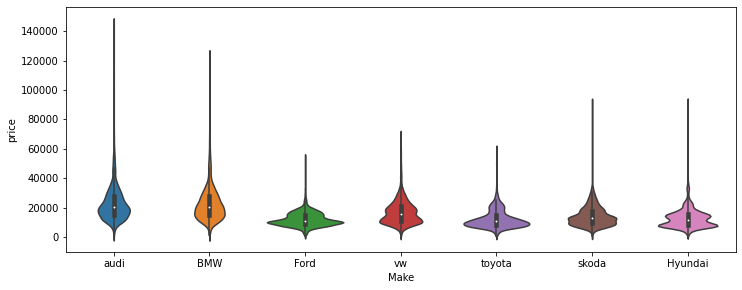

In [9]:
plt.figure(figsize=(12, 4.5))
sns.violinplot(x="Make", y="price", data=cars)
plt.show()

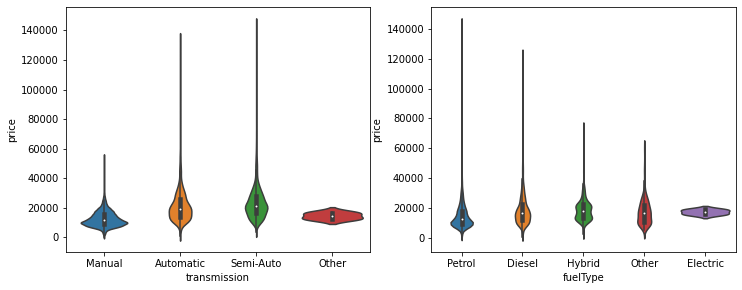

In [10]:
plt.figure(figsize=(12, 4.5))
plt.subplot(1,2,1)
sns.violinplot(x="transmission", y="price", data=cars)
plt.subplot(1,2,2)
sns.violinplot(x="fuelType", y="price", data=cars)
plt.show()

# Preprocessing and Feature Engineering
"model" varies too much and "mpg" makes no sence for electric and hybrid cars, drop these columns:

In [11]:
cars.drop(columns=["mpg", "model"], inplace=True)

use log-transformation to make the data not so skewed:

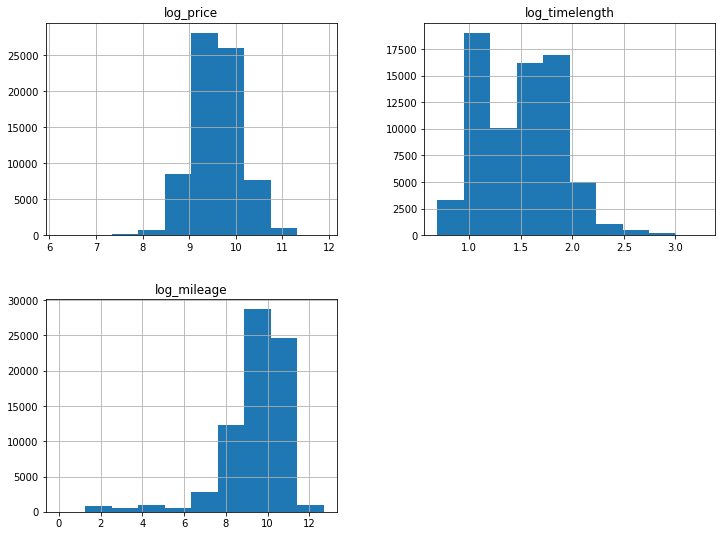

In [12]:
cars["log_price"] = cars["price"].apply(np.log)
cars["log_timelength"] = cars["year"].apply(lambda x: np.log(2022 - x))
cars["log_mileage"] = cars["mileage"].apply(np.log)

cars[["log_price", "log_timelength", "log_mileage"]].hist(figsize=(12, 9))
plt.show()

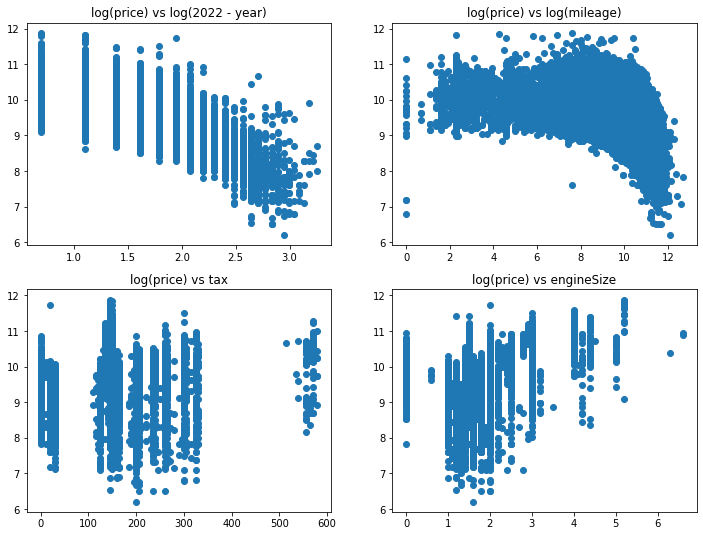

In [13]:
plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1)
plt.scatter(cars["log_timelength"], cars["log_price"])
plt.title("log(price) vs log(2022 - year)")
plt.subplot(2, 2, 2)
plt.scatter(cars["log_mileage"], cars["log_price"])
plt.title("log(price) vs log(mileage)")
plt.subplot(2, 2, 3)
plt.scatter(cars["tax"], cars["log_price"])
plt.title("log(price) vs tax")
plt.subplot(2, 2, 4)
plt.scatter(cars["engineSize"], cars["log_price"])
plt.title("log(price) vs engineSize")
plt.show()

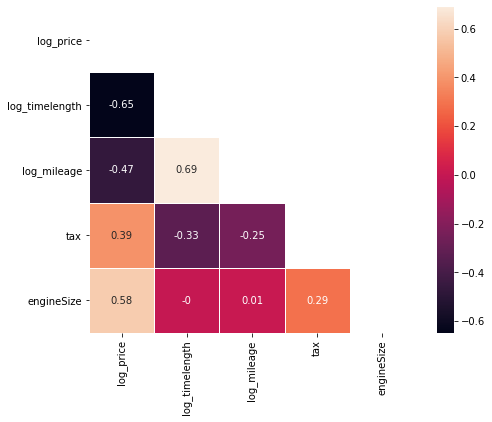

In [14]:
plt.show()
plt.figure(figsize=(8, 6))
correlations = cars[["log_price", "log_timelength", "log_mileage", "tax", "engineSize"]].corr().round(2)
mask = np.triu(np.ones_like(correlations))
sns.heatmap(data=correlations, mask=mask, square=True, linewidths=0.5, annot=True)
plt.show()

Convert categorical attributes to dummies:

In [15]:
dummy_Make = pd.get_dummies(cars["Make"], prefix="Make")
dummy_transmission = pd.get_dummies(cars["transmission"], prefix="transmission")
dummy_fuel = pd.get_dummies(cars["fuelType"], prefix="fuel")
cars_new = cars.drop(columns=["Make", "transmission", "fuelType", "price", "year", "mileage"]) \
  .join(dummy_Make.iloc[:, 1:]) \
  .join(dummy_transmission.drop(columns=["transmission_Other"])) \
  .join(dummy_fuel.drop(columns=["fuel_Other"]))
cars_new.head()

,tax,engineSize,log_price,log_timelength,log_mileage,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Petrol
0,150.0,1.4,9.433484,1.609438,9.663643,0,0,1,0,0,0,0,1,0,0,0,0,1
1,20.0,2.0,9.711116,1.791759,10.496897,0,0,1,0,0,0,1,0,0,1,0,0,0
2,30.0,1.4,9.305651,1.791759,10.307151,0,0,1,0,0,0,0,1,0,0,0,0,1
3,145.0,2.0,9.729134,1.609438,10.164004,0,0,1,0,0,0,1,0,0,1,0,0,0
4,145.0,1.0,9.758462,1.098612,7.599902,0,0,1,0,0,0,0,1,0,0,0,0,1


# Model Selection

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = cars_new.drop(columns="log_price")
y = cars_new["log_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

## Base model: Simple multiple linear regression
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

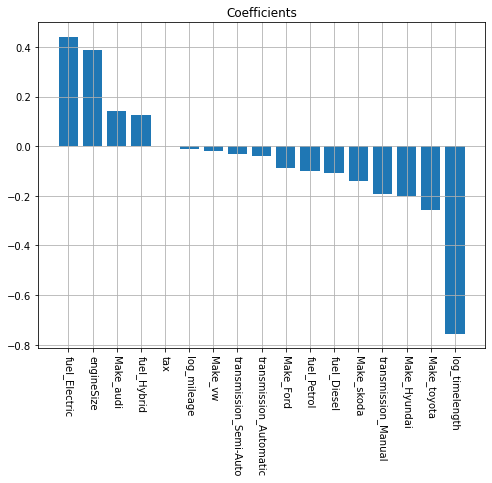

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

coef = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(coef.index, coef)
plt.grid()
plt.title("Coefficients")
plt.xticks(rotation=-90)
plt.show()

In [18]:
y_pred = lr.predict(X_test)
r2_score(np.exp(y_test), np.exp(y_pred))

0.8096881173496928

## Optimization: Lasso linear regression (variable selection)
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

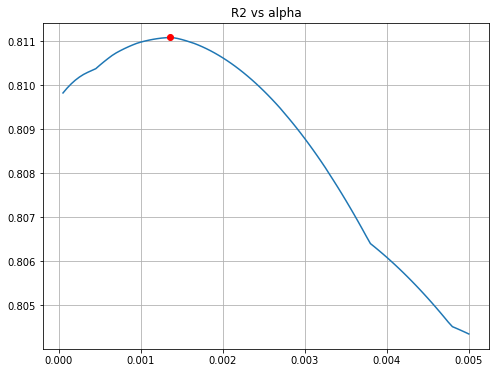

In [19]:
from sklearn.linear_model import Lasso

alphas = np.linspace(0.00005, 0.005, 100)
r2s = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    r2s.append(r2_score(np.exp(y_test), np.exp(y_pred)))

i = np.argmax(r2s)
plt.figure(figsize=(8, 6))
plt.plot(alphas, r2s)
plt.plot([alphas[i]], r2s[i], "ro")
plt.grid()
plt.title("R2 vs alpha")
plt.show()

alpha used: 0.00135
Features dropped: ['Make_vw', 'transmission_Automatic', 'transmission_Semi-Auto', 'fuel_Diesel', 'fuel_Electric', 'fuel_Petrol']


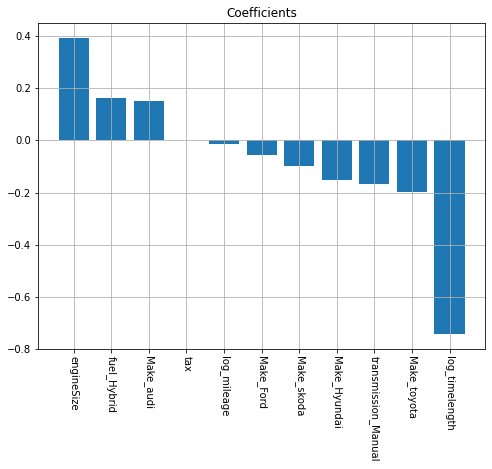

In [20]:
print("alpha used:", alphas[i])
lasso = Lasso(alpha=alphas[i])
lasso.fit(X_train, y_train)

coef = pd.Series(lasso.coef_, index=X.columns)
print("Features dropped:", coef[coef == 0.0].index.to_list())
coef = coef[coef != 0.0].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(coef.index, coef)
plt.grid()
plt.title("Coefficients")
plt.xticks(rotation=-90)
plt.show()

In [21]:
y_pred = lasso.predict(X_test)
r2_score(np.exp(y_test), np.exp(y_pred))

0.8110791102600152

## More exploration: Random Forest regression
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

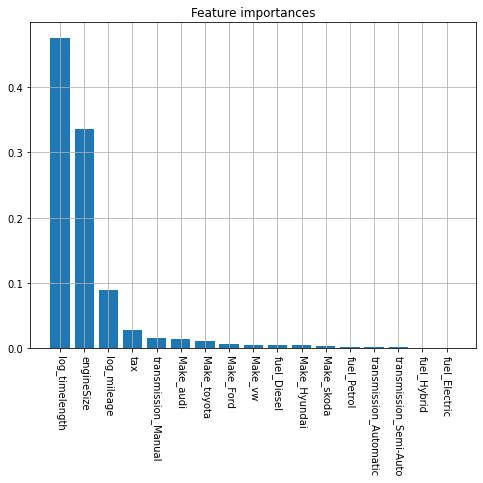

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=12345)
rf.fit(X_train, y_train)

importance = pd.Series(rf.feature_importances_, index=X.columns) \
  .sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(importance.index, importance)
plt.grid()
plt.title("Feature importances")
plt.xticks(rotation=-90)
plt.show()

In [23]:
y_pred = rf.predict(X_test)
r2_score(np.exp(y_test), np.exp(y_pred))

0.8757660387690898

In [24]:
rf = RandomForestRegressor(ccp_alpha=0.001, random_state=12345)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
r2_score(np.exp(y_test), np.exp(y_pred))

0.7472980044439469

In [25]:
rf = RandomForestRegressor(n_estimators=500, random_state=12345)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
r2_score(np.exp(y_test), np.exp(y_pred))

0.8764367127897139

In [26]:
rf = RandomForestRegressor(n_estimators=1000, random_state=12345)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
r2_score(np.exp(y_test), np.exp(y_pred))

0.876513678482345

## Advanced model: Neural Networks

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [28]:
class price_prediction(nn.Module):
    def __init__(self):
        super(price_prediction, self).__init__()
        self.fc1 = nn.Linear(17, 20)
        self.fc2 = nn.Linear(20, 50)
        self.fc3 = nn.Linear(50, 20)
        self.fc4 = nn.Linear(20, 1)
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        return self.fc4(x)

In [29]:
X_train_tensor = torch.tensor(X_train.values, dtype = torch.float)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype = torch.float)
X_test_tensor = torch.tensor(X_test.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype = torch.float)

  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 0 , Loss: 114.6186752319336
Epoch: 200 , Loss: 0.26861482858657837
Epoch: 400 , Loss: 0.16790726780891418
Epoch: 600 , Loss: 0.17510581016540527
Epoch: 800 , Loss: 0.09859368950128555
Epoch: 1000 , Loss: 0.05838882550597191
Epoch: 1200 , Loss: 0.054633717983961105
Epoch: 1400 , Loss: 0.058321256190538406
Epoch: 1600 , Loss: 0.06822606176137924
Epoch: 1800 , Loss: 0.06114134192466736
Epoch: 2000 , Loss: 0.051576320081949234
Epoch: 2200 , Loss: 0.05963641777634621
Epoch: 2400 , Loss: 0.05492632836103439
Epoch: 2600 , Loss: 0.04387027025222778
Epoch: 2800 , Loss: 0.05103486031293869


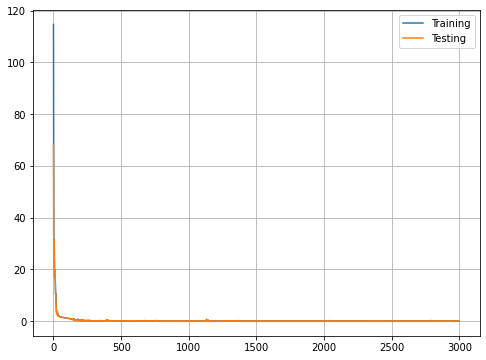

In [30]:
from tqdm.notebook import tqdm

net = price_prediction()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

nepochs = 3000
train_loss, test_loss = [], []
for epoch in tqdm(range(nepochs)):
    pass
    optimizer.zero_grad()
    output = net(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    test_loss.append(criterion(net(X_test_tensor), y_test_tensor).item())
    if epoch % 200 == 0:
        print("Epoch:", epoch, ", Loss:", loss.item())

plt.figure(figsize=(8, 6))
train_plot, = plt.plot(train_loss)
test_plot, = plt.plot(test_loss)
plt.legend(handles=[train_plot, test_plot], labels=["Training", "Testing"])
plt.grid()
plt.show()

In [31]:
y_pred = net(X_test_tensor).detach().numpy()
r2_score(y_test, y_pred)

0.8335760410759385